## Deep Learning Models
## Implementing LSTM for Sentiment Analysis.

### Continuing from the previous notebook, the saved training and testing files will be loaded here.

In [1]:
import pandas as pd

# Load CSV files
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')


In [2]:
# Inspect the data
print("X_train head:")
print(X_train.head())
print("\nX_test head:")
print(X_test.head())
print("\ny_train head:")
print(y_train.head())
print("\ny_test head:")
print(y_test.head())

# Check shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


X_train head:
                                             content
0           i find it impossible to log in each time
1  useless app i sent a request for medications t...
2                                useless information
3  excellent service for keeping in contact with ...
4  i'm not sure why installation stops right at e...

X_test head:
                                             content
0  needs some work keeps asking for info review o...
1  app is pointless it keeps removing my insuranc...
2  it wont even stay stabile enough for me to sub...
3                                       very helpful
4  the doctors at the ob rarely use the app i've ...

y_train head:
  sentiment_label
0    non-positive
1    non-positive
2    non-positive
3        positive
4    non-positive

y_test head:
  sentiment_label
0    non-positive
1    non-positive
2    non-positive
3        positive
4    non-positive
Shape of X_train: (149041, 1)
Shape of X_test: (37261, 1)
Shape of y_train: (149041, 1)
Sha

In [3]:
# Convert 'content' column to list if necessary
X_train = X_train['content'].tolist()
X_test = X_test['content'].tolist()

# Verify the conversion
print("First 5 entries in X_train:", X_train[:5])
print("Type of X_train:", type(X_train))


First 5 entries in X_train: ['i find it impossible to log in each time', "useless app i sent a request for medications that i desperately need when i head to the pharmacy they didn't have it ready; even though it says they are", 'useless information', 'excellent service for keeping in contact with your physicians', "i'm not sure why installation stops right at ending almost complete btw i have or had an existing fmh sign in & it's missing mia"]
Type of X_train: <class 'list'>


In [4]:
# Convert labels if necessary
y_train = [1 if label == "positive" else 0 for label in y_train]
y_test = [1 if label == "positive" else 0 for label in y_test]

In [5]:
# Handle non-string or NaN values in X_train and X_test
X_train = [str(x) if not pd.isnull(x) else "" for x in X_train]
X_test = [str(x) if not pd.isnull(x) else "" for x in X_test]

# Verify the data again
print("First few entries in X_train after cleaning:", X_train[:5])


First few entries in X_train after cleaning: ['i find it impossible to log in each time', "useless app i sent a request for medications that i desperately need when i head to the pharmacy they didn't have it ready; even though it says they are", 'useless information', 'excellent service for keeping in contact with your physicians', "i'm not sure why installation stops right at ending almost complete btw i have or had an existing fmh sign in & it's missing mia"]


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000)  # Use top 5000 words
tokenizer.fit_on_texts(X_train)        # Fit tokenizer on training data

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure equal length
X_train_pad = pad_sequences(X_train_seq, maxlen=100)  # Adjust maxlen if necessary
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Verify the padded data
print(f"Shape of X_train_pad: {X_train_pad.shape}")
print(f"Shape of X_test_pad: {X_test_pad.shape}")


Shape of X_train_pad: (149041, 100)
Shape of X_test_pad: (37261, 100)


In [7]:
import pandas as pd

# Reload the y_train file to inspect its structure
y_train_df = pd.read_csv('y_train.csv')

# Inspect the first few rows
print(y_train_df.head())
print(y_train_df.shape)


  sentiment_label
0    non-positive
1    non-positive
2    non-positive
3        positive
4    non-positive
(149041, 1)


In [8]:
# Extract the 'sentiment_label' column as a list
y_train = y_train_df['sentiment_label'].tolist()

# Verify the first few labels
print("First 5 labels in y_train:", y_train[:5])
print(f"Number of labels in y_train: {len(y_train)}")


First 5 labels in y_train: ['non-positive', 'non-positive', 'non-positive', 'positive', 'non-positive']
Number of labels in y_train: 149041


In [9]:
# Convert string labels to integers
y_train = [1 if label == "positive" else 0 for label in y_train]

# Convert to numpy array for TensorFlow compatibility
import numpy as np
y_train = np.array(y_train, dtype=np.float32)

# Verify the conversion
print("First 5 numerical labels in y_train:", y_train[:5])
print("Unique labels in y_train:", np.unique(y_train))  # Should output [0. 1.]
print(f"Number of labels in y_train: {len(y_train)}")


First 5 numerical labels in y_train: [0. 0. 0. 1. 0.]
Unique labels in y_train: [0. 1.]
Number of labels in y_train: 149041


In [10]:
# Load y_test.csv and extract labels
y_test_df = pd.read_csv('y_test.csv')
y_test = y_test_df['sentiment_label'].tolist()

# Convert string labels to integers
y_test = [1 if label == "positive" else 0 for label in y_test]
y_test = np.array(y_test, dtype=np.float32)

# Verify
print("First 5 numerical labels in y_test:", y_test[:5])
print("Unique labels in y_test:", np.unique(y_test))
print(f"Number of labels in y_test: {len(y_test)}")


First 5 numerical labels in y_test: [0. 0. 0. 1. 0.]
Unique labels in y_test: [0. 1.]
Number of labels in y_test: 37261


In [11]:
# Check alignment for training set
print(f"Number of samples in X_train_pad: {X_train_pad.shape[0]}")
print(f"Number of labels in y_train: {len(y_train)}")
assert X_train_pad.shape[0] == len(y_train), "Mismatch between X_train_pad and y_train!"

# Check alignment for test set
print(f"Number of samples in X_test_pad: {X_test_pad.shape[0]}")
print(f"Number of labels in y_test: {len(y_test)}")
assert X_test_pad.shape[0] == len(y_test), "Mismatch between X_test_pad and y_test!"


Number of samples in X_train_pad: 149041
Number of labels in y_train: 149041
Number of samples in X_test_pad: 37261
Number of labels in y_test: 37261


### Building the LSTM Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),  # Embedding layer
    LSTM(128, return_sequences=False),                           # LSTM layer
    Dropout(0.5),                                                # Dropout for regularization
    Dense(1, activation='sigmoid')                               # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build the model explicitly with the input shape
model.build(input_shape=(None, 100))  # None = batch size, 100 = input length (sequence length)

# Display the model architecture
model.summary()


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    X_train_pad, y_train,                # Training data
    validation_data=(X_test_pad, y_test),  # Validation data
    epochs=10,                            # Number of epochs
    batch_size=32,                        # Batch size
    verbose=1                             # Display training progress
)


Epoch 1/10
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 748s 159ms/step - accuracy: 0.9106 - loss: 0.2370 - val_accuracy: 0.9490 - val_loss: 0.1484
Epoch 2/10
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 472s 101ms/step - accuracy: 0.9548 - loss: 0.1353 - val_accuracy: 0.9563 - val_loss: 0.1313
Epoch 3/10
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 471s 101ms/step - accuracy: 0.9623 - loss: 0.1098 - val_accuracy: 0.9620 - val_loss: 0.1189
Epoch 4/10
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 515s 111ms/step - accuracy: 0.9711 - loss: 0.0877 - val_accuracy: 0.9658 - val_loss: 0.1128
Epoch 5/10
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 459s 99ms/step - accuracy: 0.9755 - loss: 0.0748 - val_accuracy: 0.9690 - val_loss: 0.1081
Epoch 6/10
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 482s 103ms/step - accuracy: 0.9793 - loss: 0.0635 - val_accuracy: 0.9705 - val_loss: 0.1036
Epoch 7/10
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 482s 103ms/step - accuracy: 0.9821 - loss: 0.0548 - val_accuracy: 0.9718 - val_loss: 0.1117
Epoch 8/10
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 476s 102ms/step - acc

### Evaluate the model on a test data

In [14]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


Test Accuracy: 97.42%
Test Loss: 0.1127


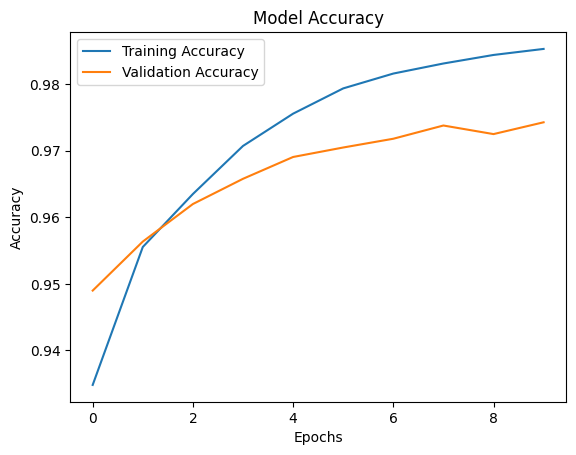

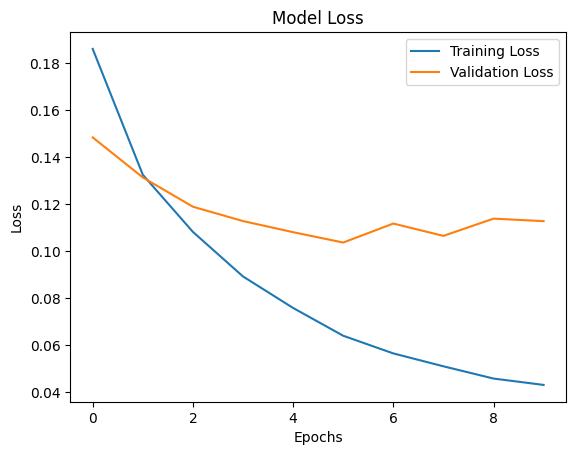

In [15]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')
plt.show()


In [16]:
### Predict on Test Data

In [17]:
predictions = model.predict(X_test_pad)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels


1165/1165 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step


In [18]:
### Generate a confusion Matrix

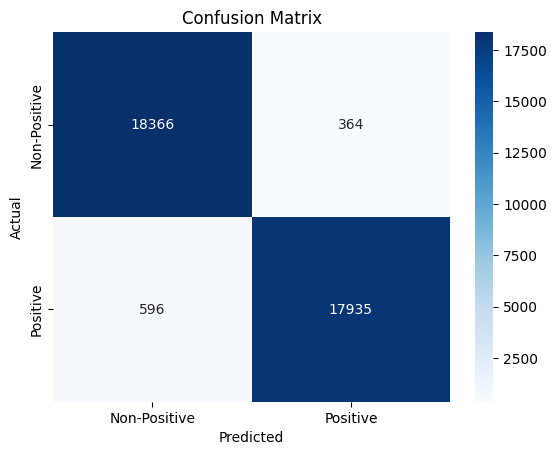

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Positive', 'Positive'], yticklabels=['Non-Positive', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:
### Compute Classification Metrics

In [21]:
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, predictions, target_names=['Non-Positive', 'Positive']))

auc = roc_auc_score(y_test, model.predict(X_test_pad))
print(f"ROC-AUC Score: {auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

Non-Positive       0.97      0.98      0.97     18730
    Positive       0.98      0.97      0.97     18531

    accuracy                           0.97     37261
   macro avg       0.97      0.97      0.97     37261
weighted avg       0.97      0.97      0.97     37261

1165/1165 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step
ROC-AUC Score: 0.99


In [22]:
# Calculate metrics
total_samples = cm.sum()
accuracy = (cm[0, 0] + cm[1, 1]) / total_samples
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Accuracy: 0.97
Precision: 0.98
Recall: 0.97
F1-Score: 0.97


In [23]:
### Visualize ROC curve

1165/1165 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step


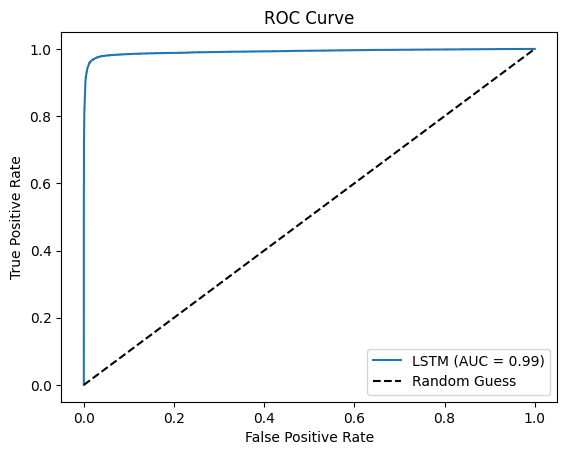

In [24]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict(X_test_pad).ravel()  # Flatten probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label='LSTM (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [25]:
### Examine Misclassifications

In [26]:
incorrect = [(X_test[i], y_test[i], predictions[i]) for i in range(len(y_test)) if y_test[i] != predictions[i]]
for review, actual, pred in incorrect[:5]:  # Show the first 5 misclassifications
    print(f"Review: {review}\nActual: {actual} (Non-Positive: 0, Positive: 1), Predicted: {pred}")


Review: ok but can't understand why i have to go to healow to leave messages because my doctor's name doesn't come up under messages despite her telling me that this is the system to exclusively use ❓ thanks for responding but where did "scheduling" come up in my initial comment ❓
Actual: 1.0 (Non-Positive: 0, Positive: 1), Predicted: [0]
Review: tried to message my dr but now he dissapeared from the appand without his name listed you can't message 
Actual: 1.0 (Non-Positive: 0, Positive: 1), Predicted: [0]
Review: i love this app but im frustrated as it wont let me change my password i think the account is under a different email
Actual: 1.0 (Non-Positive: 0, Positive: 1), Predicted: [0]
Review: better than before the last update
Actual: 0.0 (Non-Positive: 0, Positive: 1), Predicted: [1]
Review: good
Actual: 0.0 (Non-Positive: 0, Positive: 1), Predicted: [1]


In [27]:
import pandas as pd

# Define performance metrics for each model
metrics_data = {
    "Model": ["Multinomial Naive Bayes", "Random Forest", "LSTM"],
    "Accuracy": [0.92, 0.93, 0.97],
    "Precision": [0.90, 0.92, 0.98],
    "Recall": [0.91, 0.91, 0.97],
    "F1-Score": [0.90, 0.92, 0.97]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
print(metrics_df)

# Save to a CSV file if needed
metrics_df.to_csv("model_performance_metrics.csv", index=False)


                     Model  Accuracy  Precision  Recall  F1-Score
0  Multinomial Naive Bayes      0.92       0.90    0.91      0.90
1            Random Forest      0.93       0.92    0.91      0.92
2                     LSTM      0.97       0.98    0.97      0.97
